## Домашнее задание по теме "Работа с переменными"

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:

print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.

Цель задания - закрепить полученные навыки.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
data = load_boston()
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
len(df)

506

 проверяем на пропуски в данных

In [5]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

CRIM - 0.0%
ZN - 0.0%
INDUS - 0.0%
CHAS - 0.0%
NOX - 0.0%
RM - 0.0%
AGE - 0.0%
DIS - 0.0%
RAD - 0.0%
TAX - 0.0%
PTRATIO - 0.0%
B - 0.0%
LSTAT - 0.0%
MEDV - 0.0%


Пропусков нет

In [6]:
#  визуализация матрицы корреляции

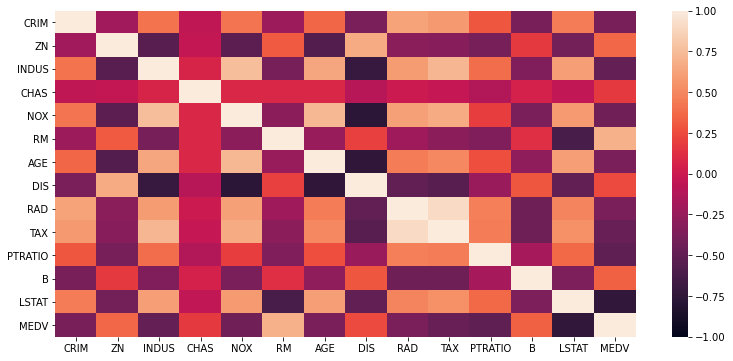

In [9]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)

In [28]:
df[['AGE', 'DIS']].corr()

,AGE,DIS
AGE,1.000000,-0.747881
DIS,-0.747881,1.000000


In [35]:
df[['RAD', 'TAX']].corr()

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Для поиска выбросов будем использовать boxplot

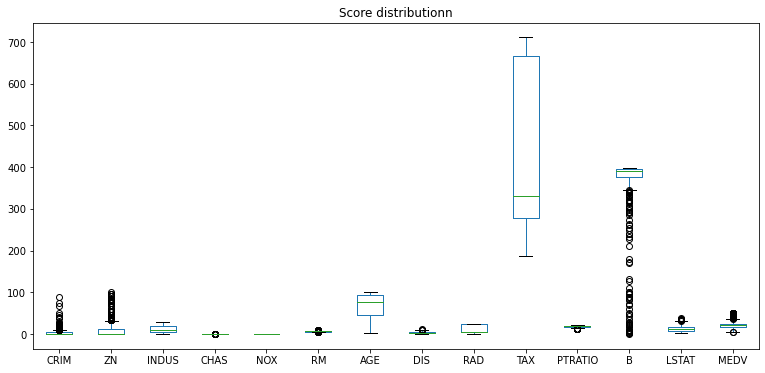

In [11]:
df.plot(kind='box',title='Score distributionn')

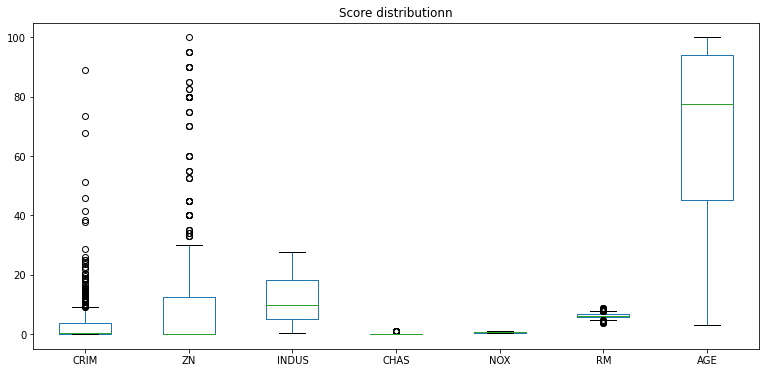

In [12]:
df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']].plot(kind='box',title='Score distributionn')

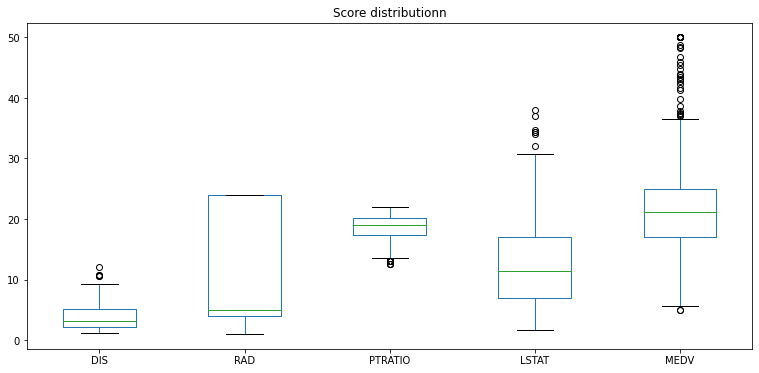

In [13]:
df[['DIS', 'RAD', 'PTRATIO', 'LSTAT', 'MEDV']].plot(kind='box',title='Score distributionn')

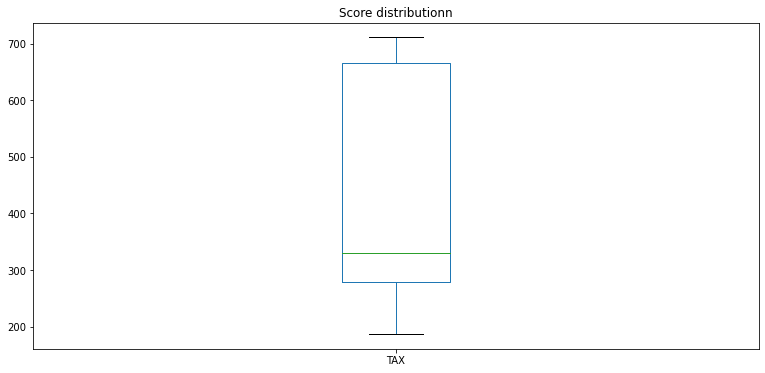

In [14]:
df[['TAX']].plot(kind='box',title='Score distributionn')

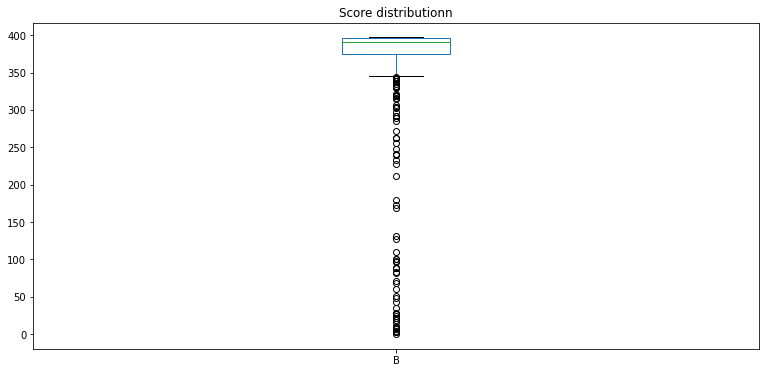

In [15]:
df[['B']].plot(kind='box',title='Score distributionn')

В колонке ['B'] много выбросов, уберем их

In [18]:
q1 = df['B'].quantile(0.25)
q3 = df['B'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['B'].between(lower_bound, upper_bound, inclusive=True)].sort_values('B')
remove_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
115,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76,18.3
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
171,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03,19.1
214,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55,23.7
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14,23.2
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60,22.3
290,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33,28.5
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9


In [30]:
print(f'Удалили строк: {len(df) - len(remove_outliers)}')

Удалили строк: 77


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
def get_score(X, y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)  
        model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
get_score(remove_outliers.iloc[:,0:-1], remove_outliers['MEDV'])

0.7128076663703489

In [33]:
get_score(df.iloc[:,0:-1], df['MEDV'])

0.7112260057484872

с выбросами результат немного хуже

Уберем признак B равный 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам, так как он с большим количеством выбросов

In [24]:
get_score(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']], df['MEDV'])

0.7166209449097785

Точность немного увеличилась


Уберем еще 'AGE' - доля занимаемых владельцами единиц, построенных до 1940 г.

In [108]:
get_score(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',  'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']], df['MEDV'])

0.7190673146383941

приведем данные к единому масштабу

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [101]:
X_scaled = scaler.fit_transform(df.iloc[:,0:-1])

In [102]:
get_score(X_scaled, df['MEDV'])

0.7112260057484925

Приведение к единому масштабу не дало увеличения точности